1変数関数予測

In [8]:
import numpy as np, matplotlib.pyplot as plt, math

In [9]:
def true_func(x):
    y = 1 - 1.5*x + np.sin(x) + np.cos(3*x)
    return y
    
np.random.seed(1)
x = np.linspace(-3, 3, 100)
y = true_func(x)

In [10]:
def kernel_func(x1, x2, i, j, hp): #カーネル関数の定義
    if i == j and all(x1 == x2):
      k = hp[0]**2 + hp[2]**2
    else:
      k = hp[0]**2*math.exp(-(1/(2*hp[1]**2))*np.sum((x1-x2)**2))
    return k

def kernel_matrix(x1, x2, hyperparam): #共分散行列Kの定義
    K = np.empty((len(x1), len(x2)))
    for i in range(len(x1)):
      for j in range(len(x2)):
        K[i,j] = kernel_func(x1[i], x2[j], i, j, hyperparam)
    return K

In [11]:
n = 4
x_data = 6*np.random.rand(n) - 3 
z_data = true_func(x_data) + np.random.normal(0, 0.1, n)#訓練データ

In [12]:
#ハイパーパラメータの学習
import GPy

kernel = GPy.kern.RBF(1)
model = GPy.models.GPRegression(x_data.reshape(-1, 1), z_data.reshape(-1,1), kernel=kernel)#xを入力、zを出力としてガウス過程回帰モデルを作成

hparam_priors = 3*[None]#ガウス分布の事前分布を設定
hparam_priors[0] = GPy.priors.Gaussian(mu=0, sigma=1)
hparam_priors[1] = GPy.priors.Gaussian(mu=0, sigma=1)
hparam_priors[2] = GPy.priors.Gaussian(mu=0, sigma=0.001)
param_name = model.parameter_names()
for i in range(3):
  hparam_priors[i].domain = "positive"
  model[param_name[i]].set_prior(hparam_priors[i])
  
model.optimize(messages=False, optimizer='scg', max_iters=1e5)#モデルの最適化 scgはスケールド共役勾配法（Scaled Conjugate Gradient）

reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.Gaussian_noise.variance


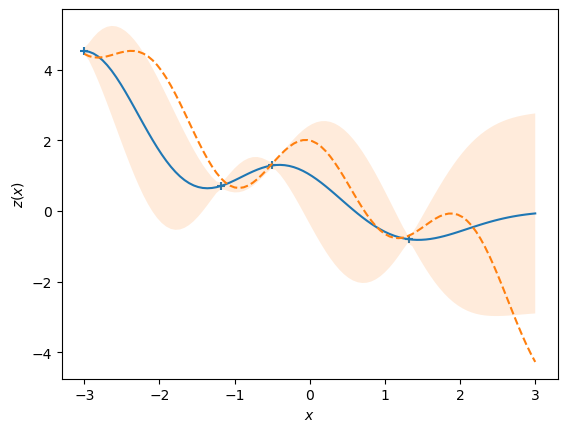

(Text(0.5, 24.0, '$x$'), Text(26.000000000000007, 0.5, '$z(x)$'), None)

In [13]:
sigma_f = np.sqrt(model.rbf.variance[0])
q = model.rbf.lengthscale[0]
sigma_n = np.sqrt(model.Gaussian_noise.variance[0])
hyperparam = [sigma_f, q, sigma_n]

x, x_data = x.reshape(-1,1), x_data.reshape(-1,1)
K_ss = kernel_matrix(x, x, hyperparam)
K = kernel_matrix(x_data, x_data, hyperparam)
invK = np.linalg.inv(K)
k_s = kernel_matrix(x, x_data, hyperparam) 

c = invK @ z_data
z_mean = k_s @ c
z_var = K_ss - k_s @ invK @ k_s.T
z_stdv = np.sqrt(np.diag(z_var))

fig, ax = plt.subplots()
ax.plot(x, z_mean), ax.plot(x, y, ls='--')
ax.scatter(x_data, z_data, marker='+')
ax.fill_between(x.flatten(), (z_mean - 2*z_stdv).flatten(), (z_mean + 2*z_stdv).flatten(), alpha=0.15)
plt.xlabel('$x$'), plt.ylabel('$z(x)$'), plt.show()

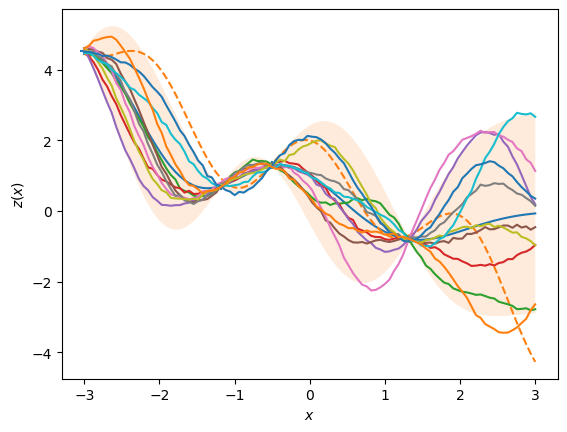

(Text(0.5, 24.0, '$x$'), Text(26.000000000000007, 0.5, '$z(x)$'), None)

In [14]:
z_samples = np.random.multivariate_normal(z_mean, z_var, 10).T

fig, ax = plt.subplots()
ax.plot(x, z_mean), ax.plot(x, y, ls='--')
ax.plot(x, z_samples), ax.scatter(x_data, z_data, marker='+')
ax.fill_between(x.flatten(), (z_mean - 2*z_stdv).flatten(), (z_mean + 2*z_stdv).flatten(), alpha=0.15)
plt.xlabel('$x$'), plt.ylabel('$z(x)$'), plt.show()

2変数関数予測

In [19]:
def kernel_func(x1, x2, i, j, hp): 
    if i == j and all(x1 == x2):
      k = hp[0]**2 + hp[2]**2
    else:
      k = hp[0]**2*math.exp(-(1/(2*hp[1]**2))*np.sum((x1-x2)**2))
    return k

def kernel_matrix(x1, x2, hyperparam):
    K = np.empty((len(x1), len(x2)))
    for i in range(len(x1)):
      for j in range(len(x2)):
        K[i,j] = kernel_func(x1[i], x2[j], i, j, hyperparam)
    return K

In [20]:
def true_func(x):
    y = np.exp(-np.sum((x-np.array([-1.2,1.2]))**2,1)) \
        + np.exp(-np.sum((x-np.array([1.2,-1.2]))**2,1))
    return y

x1 = x2 = np.linspace(-2, 2, 50)
X1, X2 = np.meshgrid(x1, x2)
x1x2 = np.c_[np.ravel(X1), np.ravel(X2)]
y = true_func(x1x2)

In [21]:
n = 10 
x1_data = 4*np.random.rand(40)[0:n] - 2 
x2_data = 4*np.random.rand(40)[0:n] - 2 
x1x2_data = np.vstack([x1_data, x2_data]).T
z_data = true_func(x1x2_data) + np.random.normal(0, 0.01, n)

In [ ]:
hyperparam = [0.2, 0.8, 0.01]
K = kernel_matrix(x1x2_data, x1x2_data, hyperparam)
invK = np.linalg.inv(K)
K_ss = kernel_matrix(x1x2, x1x2, hyperparam)
k_s = kernel_matrix(x1x2, x1x2_data, hyperparam) 

c = invK @ z_data#予測計算(平均と分散)
z_mean = k_s @ c
z_var = K_ss - k_s @ invK @ k_s.T
z_stdv = np.sqrt(np.diag(z_var))

 <>:6: SyntaxWarning:invalid escape sequence '\m'
 <>:14: SyntaxWarning:invalid escape sequence '\s'
 <>:6: SyntaxWarning:invalid escape sequence '\m'
 <>:14: SyntaxWarning:invalid escape sequence '\s'
 C:\Users\sakurai\AppData\Local\Temp\ipykernel_28860\1284378183.py:6: SyntaxWarning:invalid escape sequence '\m'
 C:\Users\sakurai\AppData\Local\Temp\ipykernel_28860\1284378183.py:14: SyntaxWarning:invalid escape sequence '\s'


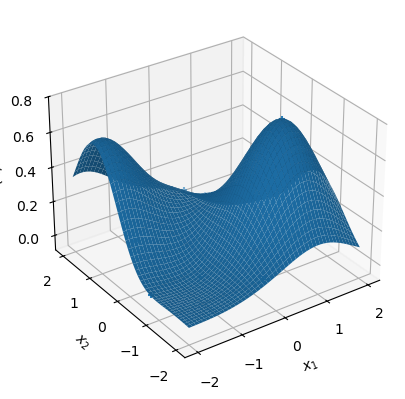

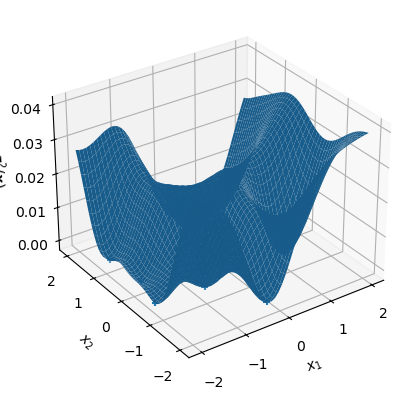

(None, None)

In [24]:
fig = plt.figure()
ax = plt.axes(projection="3d")
surf = ax.plot_surface(X1, X2, z_mean.reshape(50, 50))
ax.scatter(x1_data, x2_data, z_data, marker='+')
ax.set_xlabel('$x_1$'), ax.set_ylabel('$x_2$')
ax.set_zlabel('$\mu(\mathbf{x})$')
ax.view_init(azim=235), plt.show()

fig = plt.figure()
ax = plt.axes(projection="3d")
surf = ax.plot_surface(X1, X2, z_stdv.reshape(50, 50)**2)
ax.scatter(x1_data, x2_data, 0, marker='+')
ax.set_xlabel('$x_1$'), ax.set_ylabel('$x_2$')
ax.set_zlabel('$\sigma^2(\mathbf{x})$')
ax.view_init(azim=235), plt.show()